In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [62]:
# FUNCTION DEFINITION: function to create DataFrameMatrix with define row_name and col_name 
def matrix_maker_function(dataframe,row_name,col_name):
    df = dataframe.filter([row_name,col_name,'val'], axis=1)
    matrix_df = pd.pivot_table(df,index=[row_name],values=["val"],columns=[col_name], aggfunc='sum')             
    matrix_df = pd.DataFrame(matrix_df.to_records())                                  
    matrix_df.columns = [hdr.replace("('val', ", "").replace(")", "") \
                     for hdr in matrix_df.columns]
    return matrix_df

In [63]:
#Read main file - IHME-GBD_2017_DATA-ba7d53b0-1 (without age group)
file = pd.read_csv("Resources/IHME-GBD_2017_DATA-ba7d53b0-1.csv")            # Read the file
file.replace(['Taiwan (Province of China)'], ['Taiwan'],inplace=True)

In [88]:
# DEATH BY SUICIDE RATE/100,000 pop MATRIX
# Create base dataframe for Suicide Rate for all countries ; CauseNo = 718 for selfharm/suicide, MetricId = 3 Rate 
suicide_df = file[(file["measure_id"]==1) & (file["sex_id"]==3) &
                  (file["cause_id"] == 718) & (file["metric_id"]==3)].round(2)

#create matrix
suicide_rate_df = matrix_maker_function(suicide_df ,'location_name','year')
suicide_rate_df.rename(columns={"location_name":"Country Name"}, inplace=True)
suicide_rate_df.to_csv("Outputs/suicide_rate_df.csv", index=False)
suicide_rate_df.sort_values(by='2017', ascending=False).head(10)

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
67,Greenland,109.30,103.80,98.70,94.88,91.48,88.25,86.35,85.09,83.30,...,71.39,70.68,69.81,68.01,66.43,65.65,64.65,59.53,58.28,57.61
99,Lithuania,31.02,34.24,36.51,43.91,49.22,50.17,48.19,46.11,46.28,...,44.69,39.99,39.42,38.93,38.64,39.78,37.98,37.25,36.36,36.27
182,Ukraine,22.60,24.52,27.01,29.25,32.50,37.10,37.35,35.95,33.84,...,31.31,26.51,24.62,23.76,24.19,24.99,24.80,34.05,33.28,30.61
141,Russian Federation,31.44,32.93,38.44,49.27,56.37,54.21,49.58,45.31,44.50,...,42.09,38.91,38.53,35.41,34.22,33.32,33.55,31.91,30.44,30.03
158,South Korea,10.70,10.66,10.69,11.15,12.02,13.09,14.47,15.67,17.53,...,31.54,33.49,34.33,34.25,33.43,32.51,31.30,30.23,29.04,28.91
96,Lesotho,16.84,16.31,16.07,15.87,16.03,16.10,16.38,17.04,18.19,...,27.89,27.63,27.71,27.64,27.90,28.17,28.21,28.08,27.25,26.27
163,Suriname,21.23,21.98,22.59,23.67,23.43,22.16,21.61,22.02,22.33,...,26.82,26.61,26.59,26.25,25.98,25.75,25.30,25.65,25.51,25.68
73,Guyana,17.87,18.54,17.59,16.96,17.04,19.01,19.66,20.71,22.85,...,23.97,23.97,26.28,27.58,28.32,27.88,27.05,26.41,25.92,25.52
90,Kiribati,24.12,23.96,23.54,25.33,24.55,24.09,24.12,24.13,24.32,...,25.84,26.09,26.22,26.25,26.19,26.07,25.90,25.69,25.47,25.17
15,Belarus,22.60,23.99,26.20,30.37,32.27,34.97,35.82,37.75,39.95,...,37.93,37.38,36.59,36.76,30.70,28.65,26.92,25.32,24.56,24.83


In [65]:
#suicide_rate_df.sort_values(by='1990', ascending=False)
print(suicide_rate_df.sort_values(by='1990', ascending=False)['Country Name'].head())

67              Greenland
76                Hungary
161             Sri Lanka
154              Slovenia
141    Russian Federation
Name: Country Name, dtype: object


In [90]:
# DEPRESSION (by Incidents) RATE/100,000 pop MATRIX 
# Create base dataframe for Depression for all countries ; CauseNo = 567 Depressive disorders , measure_id = 6 Incidence
deprss_df = file[(file["sex_id"]==3) & (file["metric_id"]==3) & (file["measure_id"]==6) & (file["cause_id"] == 567)].round()

#create matrix
depression_df = matrix_maker_function(deprss_df ,'location_name','year')
depression_df.rename(columns={"location_name":"Country Name"}, inplace=True)
depression_df.sort_values(by='2017', ascending=False).head(10)

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
67,Greenland,7109.0,7164.0,7198.0,7219.0,7207.0,7176.0,7130.0,7087.0,7049.0,...,6965.0,6961.0,6955.0,6930.0,6892.0,6851.0,6785.0,6714.0,6628.0,6540.0
115,Morocco,5648.0,5661.0,5682.0,5707.0,5738.0,5774.0,5841.0,5949.0,6074.0,...,6562.0,6589.0,6614.0,6630.0,6633.0,6623.0,6604.0,6577.0,6542.0,6502.0
80,Iran,4350.0,4433.0,4507.0,4586.0,4667.0,4743.0,4812.0,4876.0,4935.0,...,5805.0,5824.0,5848.0,5883.0,5931.0,5992.0,6066.0,6155.0,6259.0,6380.0
96,Lesotho,4918.0,4894.0,4883.0,4886.0,4905.0,4940.0,4990.0,5051.0,5117.0,...,5662.0,5701.0,5726.0,5744.0,5761.0,5779.0,5797.0,5817.0,5840.0,5866.0
99,Lithuania,4577.0,4611.0,4648.0,4690.0,4736.0,4783.0,4838.0,4902.0,4968.0,...,5165.0,5170.0,5177.0,5188.0,5198.0,5207.0,5214.0,5217.0,5217.0,5215.0
182,Ukraine,5088.0,5155.0,5218.0,5274.0,5323.0,5361.0,5398.0,5443.0,5492.0,...,5377.0,5307.0,5258.0,5225.0,5192.0,5159.0,5130.0,5103.0,5081.0,5064.0
12,Bahrain,4630.0,4694.0,4738.0,4770.0,4797.0,4824.0,4856.0,4881.0,4900.0,...,4983.0,4970.0,4966.0,4966.0,4956.0,4944.0,4932.0,4923.0,4921.0,4925.0
165,Sweden,5200.0,5167.0,5133.0,5100.0,5074.0,5057.0,5041.0,5021.0,5002.0,...,5000.0,5002.0,4996.0,4982.0,4964.0,4943.0,4918.0,4891.0,4861.0,4829.0
15,Belarus,4218.0,4266.0,4317.0,4369.0,4420.0,4470.0,4524.0,4585.0,4646.0,...,4865.0,4844.0,4829.0,4815.0,4803.0,4790.0,4777.0,4767.0,4759.0,4756.0
73,Guyana,3604.0,3664.0,3722.0,3776.0,3826.0,3872.0,3915.0,3956.0,3998.0,...,4551.0,4612.0,4663.0,4702.0,4730.0,4748.0,4754.0,4748.0,4729.0,4697.0


In [91]:
# ANXIETY (by Incidents) RATE/100,000 pop MATRIX 
# Create base dataframe for Depression for all countries ; CauseNo = 571 Anxiety disorders , measure_id = 6 Incidence
anxi_df = file[(file["sex_id"]==3) & (file["metric_id"]==3) & (file["measure_id"]==6) & (file["cause_id"] == 571)].round()

#create matrix
Anxiety_df = matrix_maker_function(anxi_df ,'location_name','year')
Anxiety_df.rename(columns={"location_name":"Country Name"}, inplace=True)
Anxiety_df.sort_values(by='2017', ascending=False).head(10)

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
80,Iran,863.0,867.0,872.0,877.0,882.0,886.0,889.0,892.0,893.0,...,895.0,895.0,892.0,887.0,882.0,876.0,870.0,864.0,858.0,851.0
121,New Zealand,881.0,879.0,879.0,879.0,881.0,883.0,886.0,890.0,893.0,...,862.0,853.0,847.0,843.0,839.0,835.0,832.0,829.0,825.0,822.0
95,Lebanon,770.0,770.0,769.0,769.0,769.0,768.0,768.0,767.0,766.0,...,777.0,780.0,781.0,782.0,786.0,789.0,788.0,787.0,786.0,785.0
127,Norway,786.0,784.0,782.0,782.0,782.0,782.0,783.0,783.0,783.0,...,787.0,785.0,783.0,781.0,779.0,777.0,775.0,773.0,771.0,769.0
185,United States,787.0,785.0,784.0,783.0,784.0,785.0,789.0,797.0,806.0,...,789.0,783.0,779.0,777.0,775.0,773.0,771.0,768.0,765.0,763.0
24,Brazil,738.0,739.0,740.0,741.0,742.0,743.0,747.0,755.0,765.0,...,792.0,790.0,788.0,785.0,782.0,778.0,774.0,770.0,765.0,760.0
133,Paraguay,743.0,745.0,747.0,749.0,751.0,752.0,753.0,754.0,755.0,...,766.0,765.0,765.0,763.0,761.0,759.0,758.0,757.0,756.0,756.0
183,United Arab Emirates,702.0,707.0,713.0,717.0,721.0,724.0,726.0,728.0,730.0,...,753.0,758.0,755.0,753.0,751.0,750.0,749.0,749.0,749.0,748.0
147,Saudi Arabia,683.0,686.0,689.0,692.0,695.0,699.0,702.0,704.0,707.0,...,734.0,736.0,738.0,739.0,740.0,741.0,742.0,742.0,742.0,742.0
139,Qatar,722.0,724.0,725.0,726.0,726.0,728.0,729.0,729.0,729.0,...,739.0,742.0,743.0,744.0,743.0,742.0,741.0,740.0,740.0,741.0


In [93]:
# SUBSTANCE ABUSE (by Incidents) RATE/100,000 pop MATRIX 
# Create base dataframe for Substance Abuse for all countries ; CauseNo = 973 Substance Abuse , measure_id = 6 Incidence
Subs_abuse_df = file[(file["sex_id"]==3) & (file["metric_id"]==3) & (file["measure_id"]==6) & (file["cause_id"] == 571)].round()

#create matrix
Subs_abuse_df = matrix_maker_function(anxi_df ,'location_name','year')
Subs_abuse_df.rename(columns={"location_name":"Country Name"}, inplace=True)
Subs_abuse_df.sort_values(by='2017', ascending=False).head(10)

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
80,Iran,863.0,867.0,872.0,877.0,882.0,886.0,889.0,892.0,893.0,...,895.0,895.0,892.0,887.0,882.0,876.0,870.0,864.0,858.0,851.0
121,New Zealand,881.0,879.0,879.0,879.0,881.0,883.0,886.0,890.0,893.0,...,862.0,853.0,847.0,843.0,839.0,835.0,832.0,829.0,825.0,822.0
95,Lebanon,770.0,770.0,769.0,769.0,769.0,768.0,768.0,767.0,766.0,...,777.0,780.0,781.0,782.0,786.0,789.0,788.0,787.0,786.0,785.0
127,Norway,786.0,784.0,782.0,782.0,782.0,782.0,783.0,783.0,783.0,...,787.0,785.0,783.0,781.0,779.0,777.0,775.0,773.0,771.0,769.0
185,United States,787.0,785.0,784.0,783.0,784.0,785.0,789.0,797.0,806.0,...,789.0,783.0,779.0,777.0,775.0,773.0,771.0,768.0,765.0,763.0
24,Brazil,738.0,739.0,740.0,741.0,742.0,743.0,747.0,755.0,765.0,...,792.0,790.0,788.0,785.0,782.0,778.0,774.0,770.0,765.0,760.0
133,Paraguay,743.0,745.0,747.0,749.0,751.0,752.0,753.0,754.0,755.0,...,766.0,765.0,765.0,763.0,761.0,759.0,758.0,757.0,756.0,756.0
183,United Arab Emirates,702.0,707.0,713.0,717.0,721.0,724.0,726.0,728.0,730.0,...,753.0,758.0,755.0,753.0,751.0,750.0,749.0,749.0,749.0,748.0
147,Saudi Arabia,683.0,686.0,689.0,692.0,695.0,699.0,702.0,704.0,707.0,...,734.0,736.0,738.0,739.0,740.0,741.0,742.0,742.0,742.0,742.0
139,Qatar,722.0,724.0,725.0,726.0,726.0,728.0,729.0,729.0,729.0,...,739.0,742.0,743.0,744.0,743.0,742.0,741.0,740.0,740.0,741.0


In [73]:
def my_plot_function(x_values,y_values,x_label,y_label,title):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    rSqr = rvalue*rvalue
    #print(f"The r-squared is: {rSqr}")
    
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    scataxis = plt.subplot()
    scataxis.scatter(x_values, y_values, color = "turquoise", edgecolors= "teal")
    scataxis.set_ylim([0-(max(y_values)*0.05), max(y_values)*1.1])
    
    plt.plot(x_values,regress_values,"r-", alpha = .5, color='red')
    plt.annotate(line_eq,(min(x_values),5),fontsize=12,color="red")

    plt.grid(alpha = .2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{title}')
    
    plt.savefig(f"Outputs/{title}.png")
    plt.show()  

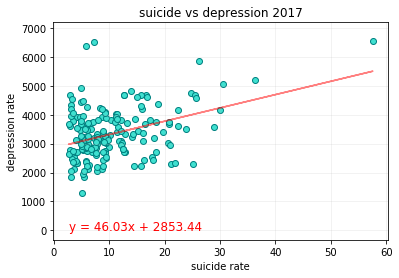

In [74]:
# Generate a scatter plot between suicide rate and depression rate in 2017
x_values = suicide_rate_df["2017"]
y_values = depression_df["2017"]
my_plot_function(x_values,y_values,"suicide rate","depression rate","suicide vs depression 2017")

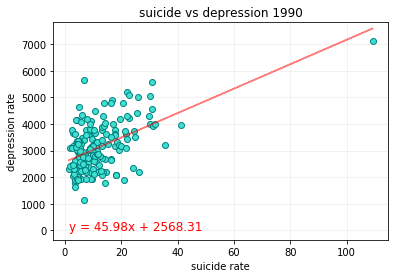

In [77]:
# Generate a scatter plot between suicide rate and depression rate in 2017
x_values = suicide_rate_df["1990"]
y_values = depression_df["1990"]
my_plot_function(x_values,y_values,"suicide rate","depression rate","suicide vs depression 1990")

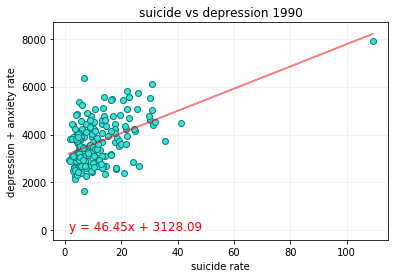

In [84]:
# Generate a scatter plot between suicide rate and depression rate in 2017
x_values = suicide_rate_df["1990"]
y_values = dep_anx_df["1990"]
my_plot_function(x_values,y_values,"suicide rate","depression + anxiety rate","suicide vs depression 1990")

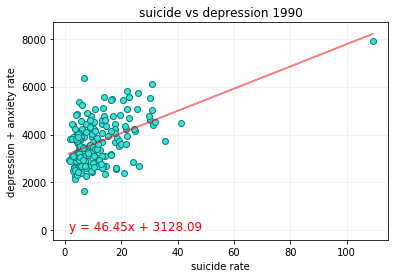

In [85]:
# Generate a scatter plot between suicide rate and depression rate in 2017
x_values = suicide_rate_df["1990"]
y_values = dep_anx_df["1990"]
my_plot_function(x_values,y_values,"suicide rate","depression + anxiety rate","suicide vs depression 1990")

In [37]:
# Generate a scatter plot between suicide rate and depression rate in 2017
x_values = suicide_rate_df["2017"]
y_values = depression_df["2017"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
rSqr = rvalue*rvalue
print(f"The r-squared is: {rSqr}")
    
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(8, 5)) 
plt.scatter(x_values,y_values, color = "turquoise", edgecolors= "teal")
plt.plot(x_values,regress_values,"r-", alpha = .5, color='red')
plt.annotate(line_eq,(min(40,3000),fontsize=12,color="red")

# Give our graph axis labels, and legends
plt.title("Suicide v/s Depression")
plt.xlabel("Suicide death rate/100,000")
plt.ylabel("Depression rate/100,000")  

plt.savefig("Outputs/Scatter1.png")
plt.show()

SyntaxError: invalid syntax (<ipython-input-37-b695c91441ea>, line 15)

In [38]:
# SUICIDE BY FIREARM RATE MATRIX
# Create base dataframe for Suicide by firearm Rate for all countries ; CauseNo = 721, MetricId = 3 Rate
firearms_df = file[(file["sex_id"]==3) & (file["metric_id"]==3) & (file["measure_id"]==1) & (file["cause_id"] == 721)].round(2)

#create matrix
byfirearm_rate_df = matrix_maker_function(firearms_df ,'location_name','year')
byfirearm_rate_df.rename(columns={"location_name":"Country Name"}, inplace=True)
byfirearm_rate_df

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.48,0.47,0.45,0.43,0.43,0.42,0.41,0.40,0.39,...,0.34,0.34,0.33,0.32,0.32,0.32,0.31,0.31,0.31,0.31
1,Albania,0.85,0.92,0.91,0.91,0.90,0.98,1.11,1.32,1.48,...,1.31,1.25,1.18,1.21,1.22,1.23,1.25,1.25,1.24,1.23
2,Algeria,0.20,0.20,0.21,0.21,0.22,0.23,0.23,0.24,0.24,...,0.26,0.26,0.26,0.26,0.25,0.25,0.24,0.24,0.23,0.23
3,American Samoa,0.86,0.85,0.84,0.83,0.83,0.83,0.83,0.85,0.80,...,0.53,0.53,0.54,0.54,0.53,0.55,0.55,0.56,0.57,0.57
4,Andorra,1.25,1.24,1.24,1.21,1.18,1.15,1.12,1.07,1.05,...,0.88,0.87,0.86,0.83,0.82,0.82,0.82,0.81,0.81,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,...,0.21,0.21,0.21,0.20,0.20,0.20,0.20,0.20,0.20,0.20
191,"Virgin Islands, U.S.",2.06,2.05,2.06,2.09,2.16,2.04,2.02,2.01,2.04,...,2.05,2.06,2.16,2.20,2.21,2.27,2.29,2.34,2.33,2.33
192,Yemen,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,...,0.24,0.24,0.24,0.24,0.23,0.23,0.23,0.23,0.23,0.24
193,Zambia,0.55,0.57,0.59,0.60,0.61,0.62,0.63,0.63,0.63,...,0.54,0.54,0.54,0.53,0.52,0.51,0.50,0.50,0.49,0.49


In [39]:
# PERCENTAGE SUICIDE BY FIREARM
byfirearm_pct_df = suicide_rate_df.filter(['Country Name'], axis=1).reset_index(drop=True)  # create heading column
Time = suicide_rate_df.keys()

for i in range(1,len(Time)):
    byfirearm_pct_df[Time[i]]=(100*byfirearm_rate_df[Time[i]]/suicide_rate_df[Time[i]]).round(2)
    
byfirearm_pct_df.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,6.49,6.41,6.45,6.30,6.29,6.20,6.17,6.08,5.97,...,5.93,6.04,5.96,5.86,5.94,5.98,5.85,5.86,5.88,5.90
1,Albania,23.42,23.90,24.14,24.66,25.21,26.20,27.61,30.48,32.31,...,22.74,22.01,20.63,21.04,21.18,21.17,21.26,21.22,21.09,20.99
2,Algeria,5.01,4.95,5.11,5.00,5.00,5.12,5.01,5.11,5.04,...,5.49,5.57,5.66,5.70,5.57,5.61,5.41,5.47,5.39,5.48
3,American Samoa,14.55,14.51,14.48,14.34,14.36,14.41,14.46,14.73,13.94,...,9.52,9.48,9.49,9.36,9.06,9.27,9.15,9.08,9.18,9.11
4,Andorra,9.59,9.43,9.39,9.23,9.15,9.11,9.02,8.57,8.52,...,7.87,7.84,7.83,7.76,7.71,7.77,7.95,7.93,7.93,7.91


In [40]:
#suicide_rate_df.sort_values(by='1990', ascending=False)
print(byfirearm_pct_df.sort_values(by='1990', ascending=False)['Country Name'].head())

185    United States
186          Uruguay
7          Argentina
37          Colombia
189        Venezuela
Name: Country Name, dtype: object


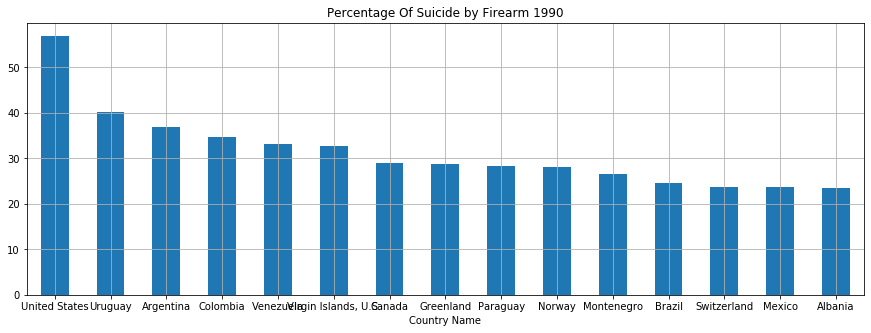

In [41]:
# Generate bar plot for Percentage Of Suicide by Firearm 1990
SuicideByFirearm1990 = byfirearm_pct_df.filter(['Country Name','1990'], axis=1).set_index('Country Name')
SuicideByFirearm1990.sort_values(by='1990', ascending=False,inplace=True)
SuicideByFirearm1990 = SuicideByFirearm1990.iloc[:15,0]
SuicideByFirearm1990.plot(kind="bar", figsize=(15,5), legend = False, rot = 0, grid = True,
                          title ="Percentage Of Suicide by Firearm 1990")
plt.savefig('SuicideByFirearm1990.png')

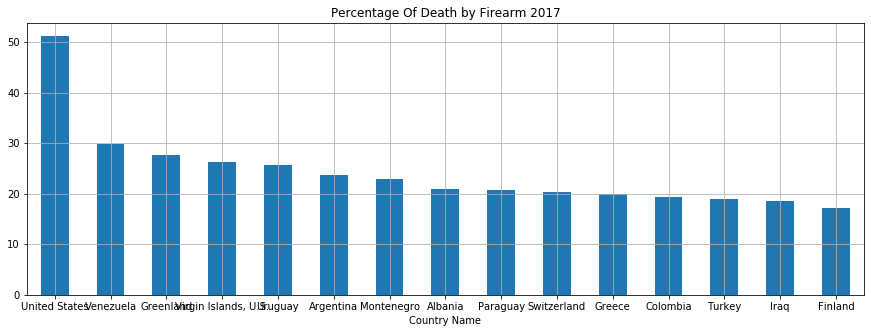

In [42]:
# Generate bar plot for Percentage Of Suicide by Firearm 2017  
SuicideByFirearm1990 = byfirearm_pct_df.filter(['Country Name','2017'], axis=1).set_index('Country Name')
SuicideByFirearm1990.sort_values(by='2017', ascending=False,inplace=True)
SuicideByFirearm1990 = SuicideByFirearm1990.iloc[:15,0]
SuicideByFirearm1990.plot(kind="bar", figsize=(15,5), legend = False, rot = 0, grid = True,
                          title ="Percentage Of Death by Firearm 2017")
plt.savefig('SuicideByFirearm2017.png')

In [43]:
# SUICIDE BY REGION (definision please see http://ghdx.healthdata.org/countries)
# retrieve file and create base dataframe for Suicide for all region ; CauseNo = 718 for selfharm/suicide, MetricId = 3 Rate
file2 = pd.read_csv("Resources/IHME-GBD_2017_DATA-3a91bc48-1.csv")
reg_df = file2[(file2["sex_id"]==3) & (file2["metric_id"]==3) & (file2["measure_id"]==1) & (file2["cause_id"] == 721)].round(2)

#create matrix
region_df = matrix_maker_function(reg_df ,'location_name','year')
region_df.rename(columns={"location_name":"Region"}, inplace=True)
region_df.head(1)

,Region,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Africa,0.54,0.54,0.54,0.55,0.55,0.56,0.56,0.57,0.58,...,0.54,0.53,0.53,0.52,0.51,0.5,0.49,0.49,0.49,0.49


In [44]:
file4 = pd.read_csv("Resources/IHME-GBD_2017_DATA-0b0c808a-1.csv")

file4_df = file4[(file4["sex_id"]==3) & (file4["metric_id"]==1)  & (file4["location_name"]=="Canada") & (file4["measure_id"]==1)]
file4_df.head(3)


,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
98,1,Deaths,101,Canada,3,Both,22,All Ages,386,Nutritional deficiencies,1,Number,1990,143.542463,151.471457,136.201487
104,1,Deaths,101,Canada,3,Both,22,All Ages,410,Neoplasms,1,Number,1990,55822.485354,56518.770893,54416.565032
128,1,Deaths,101,Canada,3,Both,22,All Ages,491,Cardiovascular diseases,1,Number,1990,73181.597028,74116.468628,72367.591718


In [45]:
death_cause_df = pd.pivot_table(file4_df, index=["cause_name"],values=["val"],columns=["year"])
death_cause_df = pd.DataFrame(death_cause_df.to_records())
death_cause_df.columns = [hdr.replace("('val', ", "").replace(")", "") \
                     for hdr in death_cause_df.columns]
death_cause_df = death_cause_df.sort_values(by='2017', ascending=True).round()

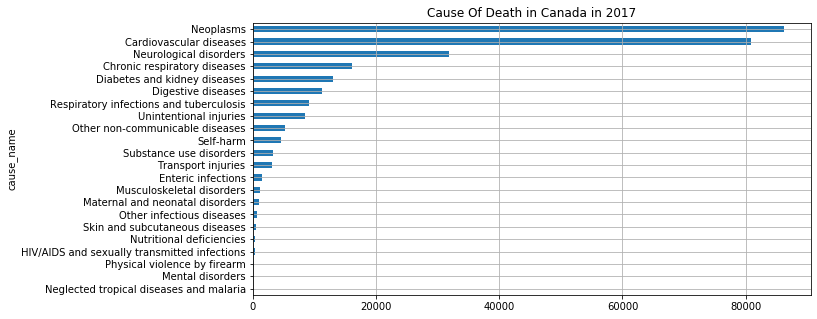

In [46]:
# Generate a horisontal bar plot  
CauseOfDeath = death_cause_df.filter(['cause_name','2017'], axis=1).set_index('cause_name')
CauseOfDeath.plot(kind="barh", figsize=(10,5), legend = False, rot = 0, grid = True, title ="Cause Of Death in Canada in 2017")

In [47]:
# SUICIDE BY AGE - WORLD
# retrieve file 
file3 = pd.read_csv("Resources/IHME-GBD_2017_DATA-c50a2fa5-1.csv")

# create base dataframe of cause of death for each age group in 2017 
# location=global location_id=1, MetricId = 1 Number, sex_id = 3 both, measure_id = 1 death , year = 2017
age_temp_df = file3[(file3["location_id"]==1) & (file3["sex_id"]==3) & (file3["metric_id"]==1) & 
               (file3["measure_id"]==1) & (file3["year"]==2017) ].round()
#create matrix
age_mtx = matrix_maker_function(age_temp_df ,'cause_name','age_name')

#clean the matrix
age_mtx.drop([19], axis=0,inplace=True)
age_df = age_mtx.drop(["'5 to 9'","'Under 5'"], axis=1)
age_df.insert(1, "'5 to 9'", age_mtx["'5 to 9'"])
age_df.insert(1, "'Under 5'", age_mtx["'Under 5'"])
age_df = age_df.fillna(0).set_index('cause_name')
age_df.head(1)

,'Under 5','5 to 9','10 to 14','15 to 19','20 to 24','25 to 29','30 to 34','35 to 39','40 to 44','45 to 49','50 to 54','55 to 59','60 to 64','65 to 69','70 to 74','75 to 79','80 to 84','85 to 89','90 to 94','95 plus'
cause_name,,,,,,,,,,,,,,,,,,,,
All causes,5391562.0,412113.0,319630.0,516509.0,709782.0,838974.0,1006999.0,1164779.0,1448494.0,1928487.0,2621964.0,3112789.0,4245092.0,5018790.0,5272671.0,5964171.0,6441449.0,5311646.0,3032676.0,1187152.0


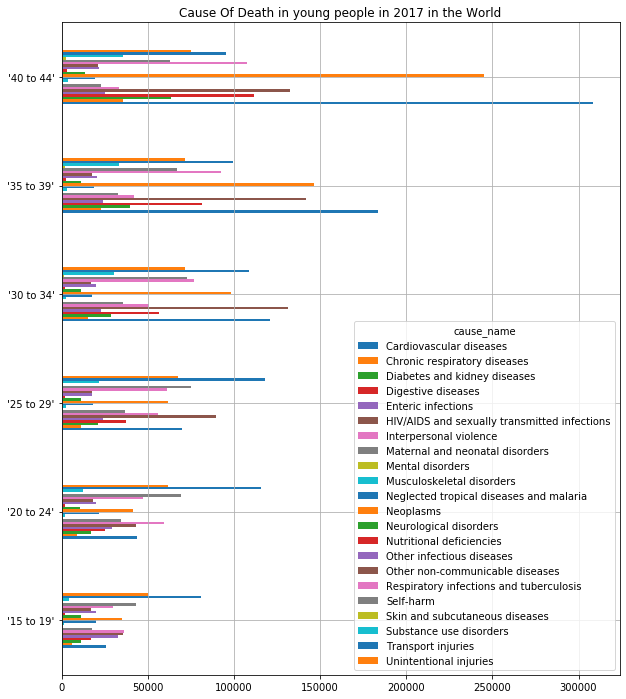

In [48]:
# Generate a horisontal bar plot for Cause Of Death in young people in the World
# modDfObj = dfObj.drop([dfObj.index[0] , dfObj.index[1]])
DeathByAge = age_df.drop(age_df.columns[[0,1,2,9,10,11,12,13,14,15,16,17,18,19]], axis=1)
DeathByAge.drop(DeathByAge.index[0], axis=0, inplace=True)
DeathByAge = DeathByAge.transpose()
DeathByAge.plot(kind="barh", figsize=(10,12), legend = True, rot = 0, grid = True, 
                title ="Cause Of Death in young people in 2017 in the World")
plt.savefig('Outputs/Death in young World.png')

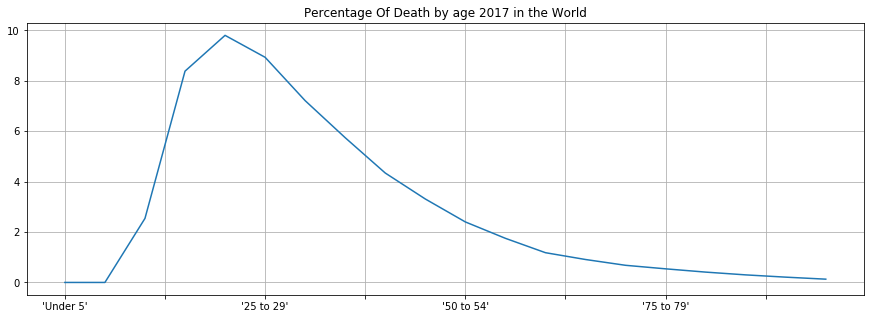

In [50]:
SuicidePct = age_df.transpose()
SuicidePct.insert(0, "Percentage Of Death", (100*SuicidePct["Self-harm"] / SuicidePct["All causes"]))
SuicidePct = SuicidePct.drop(SuicidePct.columns[1:24], axis=1).round(2)
SuicidePct.plot(kind="line", figsize=(15,5), legend = False, grid = True, use_index = True,
                          title ="Percentage Of Death by age 2017 in the World")
plt.savefig('Outputs/SuicidePct.png')

In [51]:
age_10_df = age_5_df.filter(['cause_name'], axis=1)
age_10_df["0 to 9"] = age_5_df["'Under 5'"] + age_5_df["'5 to 9'"]
age_10_df["10 to 19"] = age_5_df["'10 to 14'"] + age_5_df["'15 to 19'"]
age_10_df["20 to 29"] = age_5_df["'20 to 24'"] + age_5_df["'25 to 29'"]
age_10_df["30 to 39"] = age_5_df["'30 to 34'"] + age_5_df["'35 to 39'"]
age_10_df["40 to 49"] = age_5_df["'40 to 44'"] + age_5_df["'45 to 49'"]
age_10_df["50 to 59"] = age_5_df["'50 to 54'"] + age_5_df["'55 to 59'"]
age_10_df["60 to 69"] = age_5_df["'60 to 64'"] + age_5_df["'65 to 69'"]
age_10_df["70 to 79"] = age_5_df["'70 to 74'"] + age_5_df["'75 to 79'"]
age_10_df["80 to 89"] = age_5_df["'80 to 84'"] + age_5_df["'85 to 89'"]
age_10_df["90 plus"] = age_5_df["'90 to 94'"] + age_5_df["'95 plus'"]
age_10_df

NameError: name 'age_5_df' is not defined

In [52]:
# SUICIDE BY AGE - CANADA
# create base dataframe of cause of death for each age group in 2017 in Canada
# location=global location_id=1, MetricId = 1 Number, sex_id = 3 both, measure_id = 1 death , year = 2017
cnd_age_temp_df = file3[(file3["location_id"]==101) & (file3["sex_id"]==3) & (file3["metric_id"]==1) & 
               (file3["measure_id"]==1) & (file3["year"]==2017) ].round()
#create matrix
cnd_age_mtx = matrix_maker_function(cnd_age_temp_df ,'cause_name','age_name')

#clean the matrix
cnd_age_mtx.drop([19], axis=0,inplace=True)
cnd_age_df = cnd_age_mtx.drop(["'5 to 9'","'Under 5'"], axis=1)
cnd_age_df.insert(1, "'5 to 9'", cnd_age_mtx["'5 to 9'"])
cnd_age_df.insert(1, "'Under 5'", cnd_age_mtx["'Under 5'"])
cnd_age_df = cnd_age_df.fillna(0).set_index('cause_name')
cnd_age_df.head(1)

,'Under 5','5 to 9','10 to 14','15 to 19','20 to 24','25 to 29','30 to 34','35 to 39','40 to 44','45 to 49','50 to 54','55 to 59','60 to 64','65 to 69','70 to 74','75 to 79','80 to 84','85 to 89','90 to 94','95 plus'
cause_name,,,,,,,,,,,,,,,,,,,,
All causes,2091.0,181.0,249.0,804.0,1236.0,1341.0,1557.0,1922.0,2867.0,4722.0,8412.0,12857.0,17151.0,22575.0,27612.0,32216.0,40109.0,44845.0,35147.0,21508.0


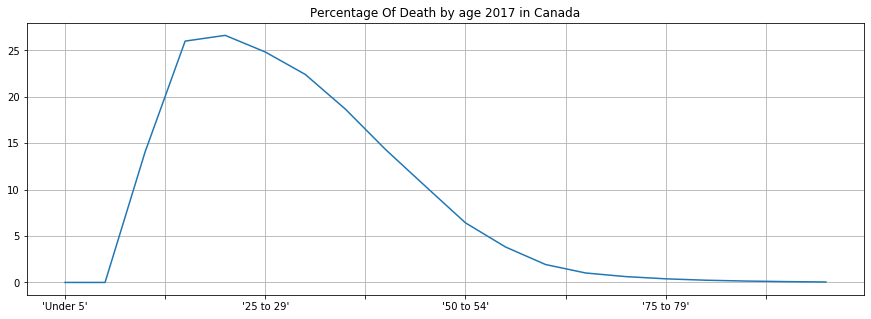

In [53]:
CndSuicidePct = cnd_age_df.transpose()
CndSuicidePct.insert(0, "Percentage Of Death", (100*CndSuicidePct["Self-harm"] / CndSuicidePct["All causes"]))
CndSuicidePct = CndSuicidePct.drop(CndSuicidePct.columns[1:24], axis=1).round(2)
CndSuicidePct.plot(kind="line", figsize=(15,5), legend = False, grid = True, use_index = True,
                          title ="Percentage Of Death by age 2017 in Canada")
plt.savefig('Outputs/CndSuicidePct.png')

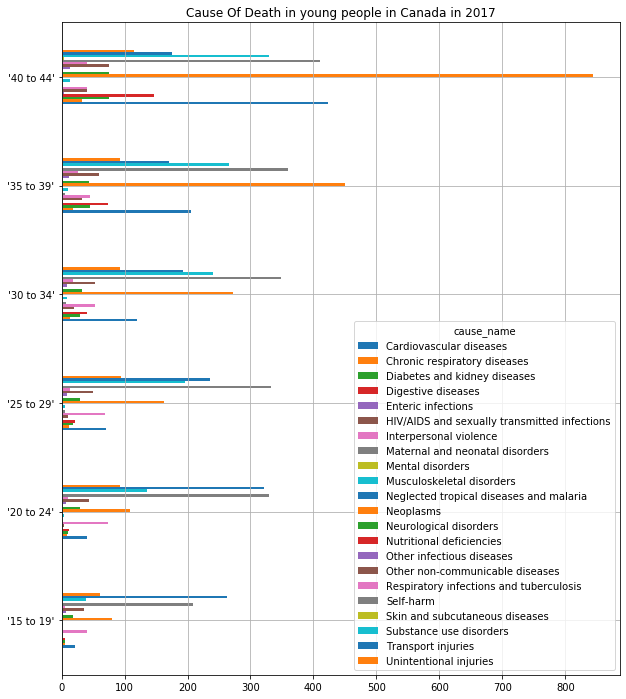

In [55]:
# Generate a horisontal bar plot for Cause Of Death in young people in Canada
# modDfObj = dfObj.drop([dfObj.index[0] , dfObj.index[1]])
DeathByAge = cnd_age_df.drop(cnd_age_df.columns[[0,1,2,9,10,11,12,13,14,15,16,17,18,19]], axis=1)
DeathByAge.drop(DeathByAge.index[0], axis=0, inplace=True)
DeathByAge = DeathByAge.transpose()
DeathByAge.plot(kind="barh", figsize=(10,12), legend = True, rot = 0, grid = True, 
                title ="Cause Of Death in young people in Canada in 2017")
plt.savefig('Outputs/Death in young in Canada.png')